In [67]:
import os
import json

v1 = json.load(open('./trump/vectors.json'))
v2 = json.load(open('./trump/new_vectors.json'))

In [68]:
c1 = json.load(open('./trump/classes.json'))
c2 = json.load(open('./trump/classes_bert.json'))

In [69]:
ex=json.load(open('./trump/extracts.json'))

In [70]:
ex[1][20]

" During his presidency , Trump ordered a travel ban on citizens from several Muslim-majority countries, citing security concerns; after legal challenges , the Supreme Court upheld the policy's third revision ."

In [71]:
import umap
from time import time

import itertools
def umap_vectors(vectors):
    t0 = time()
    fit_data = list(itertools.chain(*vectors))

    fit = umap.UMAP(n_neighbors=15, random_state=42, n_components=2, metric='cosine')
    u = fit.fit(fit_data)
    print("UMAP fit took %0.2f sec" % (time() - t0))

    t0 = time()
    new_vectors = []
    for ext in vectors:
        if len(ext) > 0:
            new_ext = u.transform(ext)
        else:
            new_ext = ext
        new_vectors.append(new_ext)
    print("UMAP transform took %0.2f sec" % (time() - t0))
    
    return new_vectors


In [72]:
v1_umap=umap_vectors(v1)

UMAP fit took 2.45 sec
UMAP transform took 0.53 sec


In [73]:
v2_umap=umap_vectors(v2)

UMAP fit took 2.39 sec
UMAP transform took 0.65 sec


In [8]:
for v,c in zip(v1_umap,c1):
    if len(v)==0:
        v1_umap.remove(v)
        c1.remove(c)
 

/Users/wweschen/UMAP_expriments/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
for x in ex:
    if len(x)==0:
        ex.remove(x) 

In [74]:
clustered_sentence_umap_v1=[]
clustered_sentence_umap_c1=[]
sentences1=[]
for c,v,g in zip(c1,v1_umap,ex):
    for cs,s,x in zip(c,v,g):
        clustered_sentence_umap_v1.append(list(s))
        clustered_sentence_umap_c1.append(cs['class'])
        sentences1.append(x)

In [75]:
clustered_sentence_umap_v2=[]
clustered_sentence_umap_c2=[]
sentences2=[]

for c,v,g in zip(c2,v2_umap,ex):
    for cs,s,x in zip(c,v,g):
        clustered_sentence_umap_v2.append(list(s))
        clustered_sentence_umap_c2.append(cs['class'])
        sentences2.append(x)

In [76]:
classified_sentences1=[]
for c,s in zip(clustered_sentence_umap_c1,sentences1):
    classified_sentences1.append([c,s])

sorted_sentences1 = sorted(classified_sentences1, key=lambda x: x[0])
 

In [77]:
 
classified_sentences2=[]
for c,s in zip(clustered_sentence_umap_c2,sentences2):
    classified_sentences2.append([c,s])

sorted_sentences2 = sorted(classified_sentences2, key=lambda x: x[0])
 

In [78]:
 
with open('./trump/bert_sorted_classes.json', 'w') as f:
    json.dump(sorted_sentences2, f)
    
with open('./trump/word2vec_sorted_classes.json', 'w') as f:
    json.dump(sorted_sentences1, f)
 

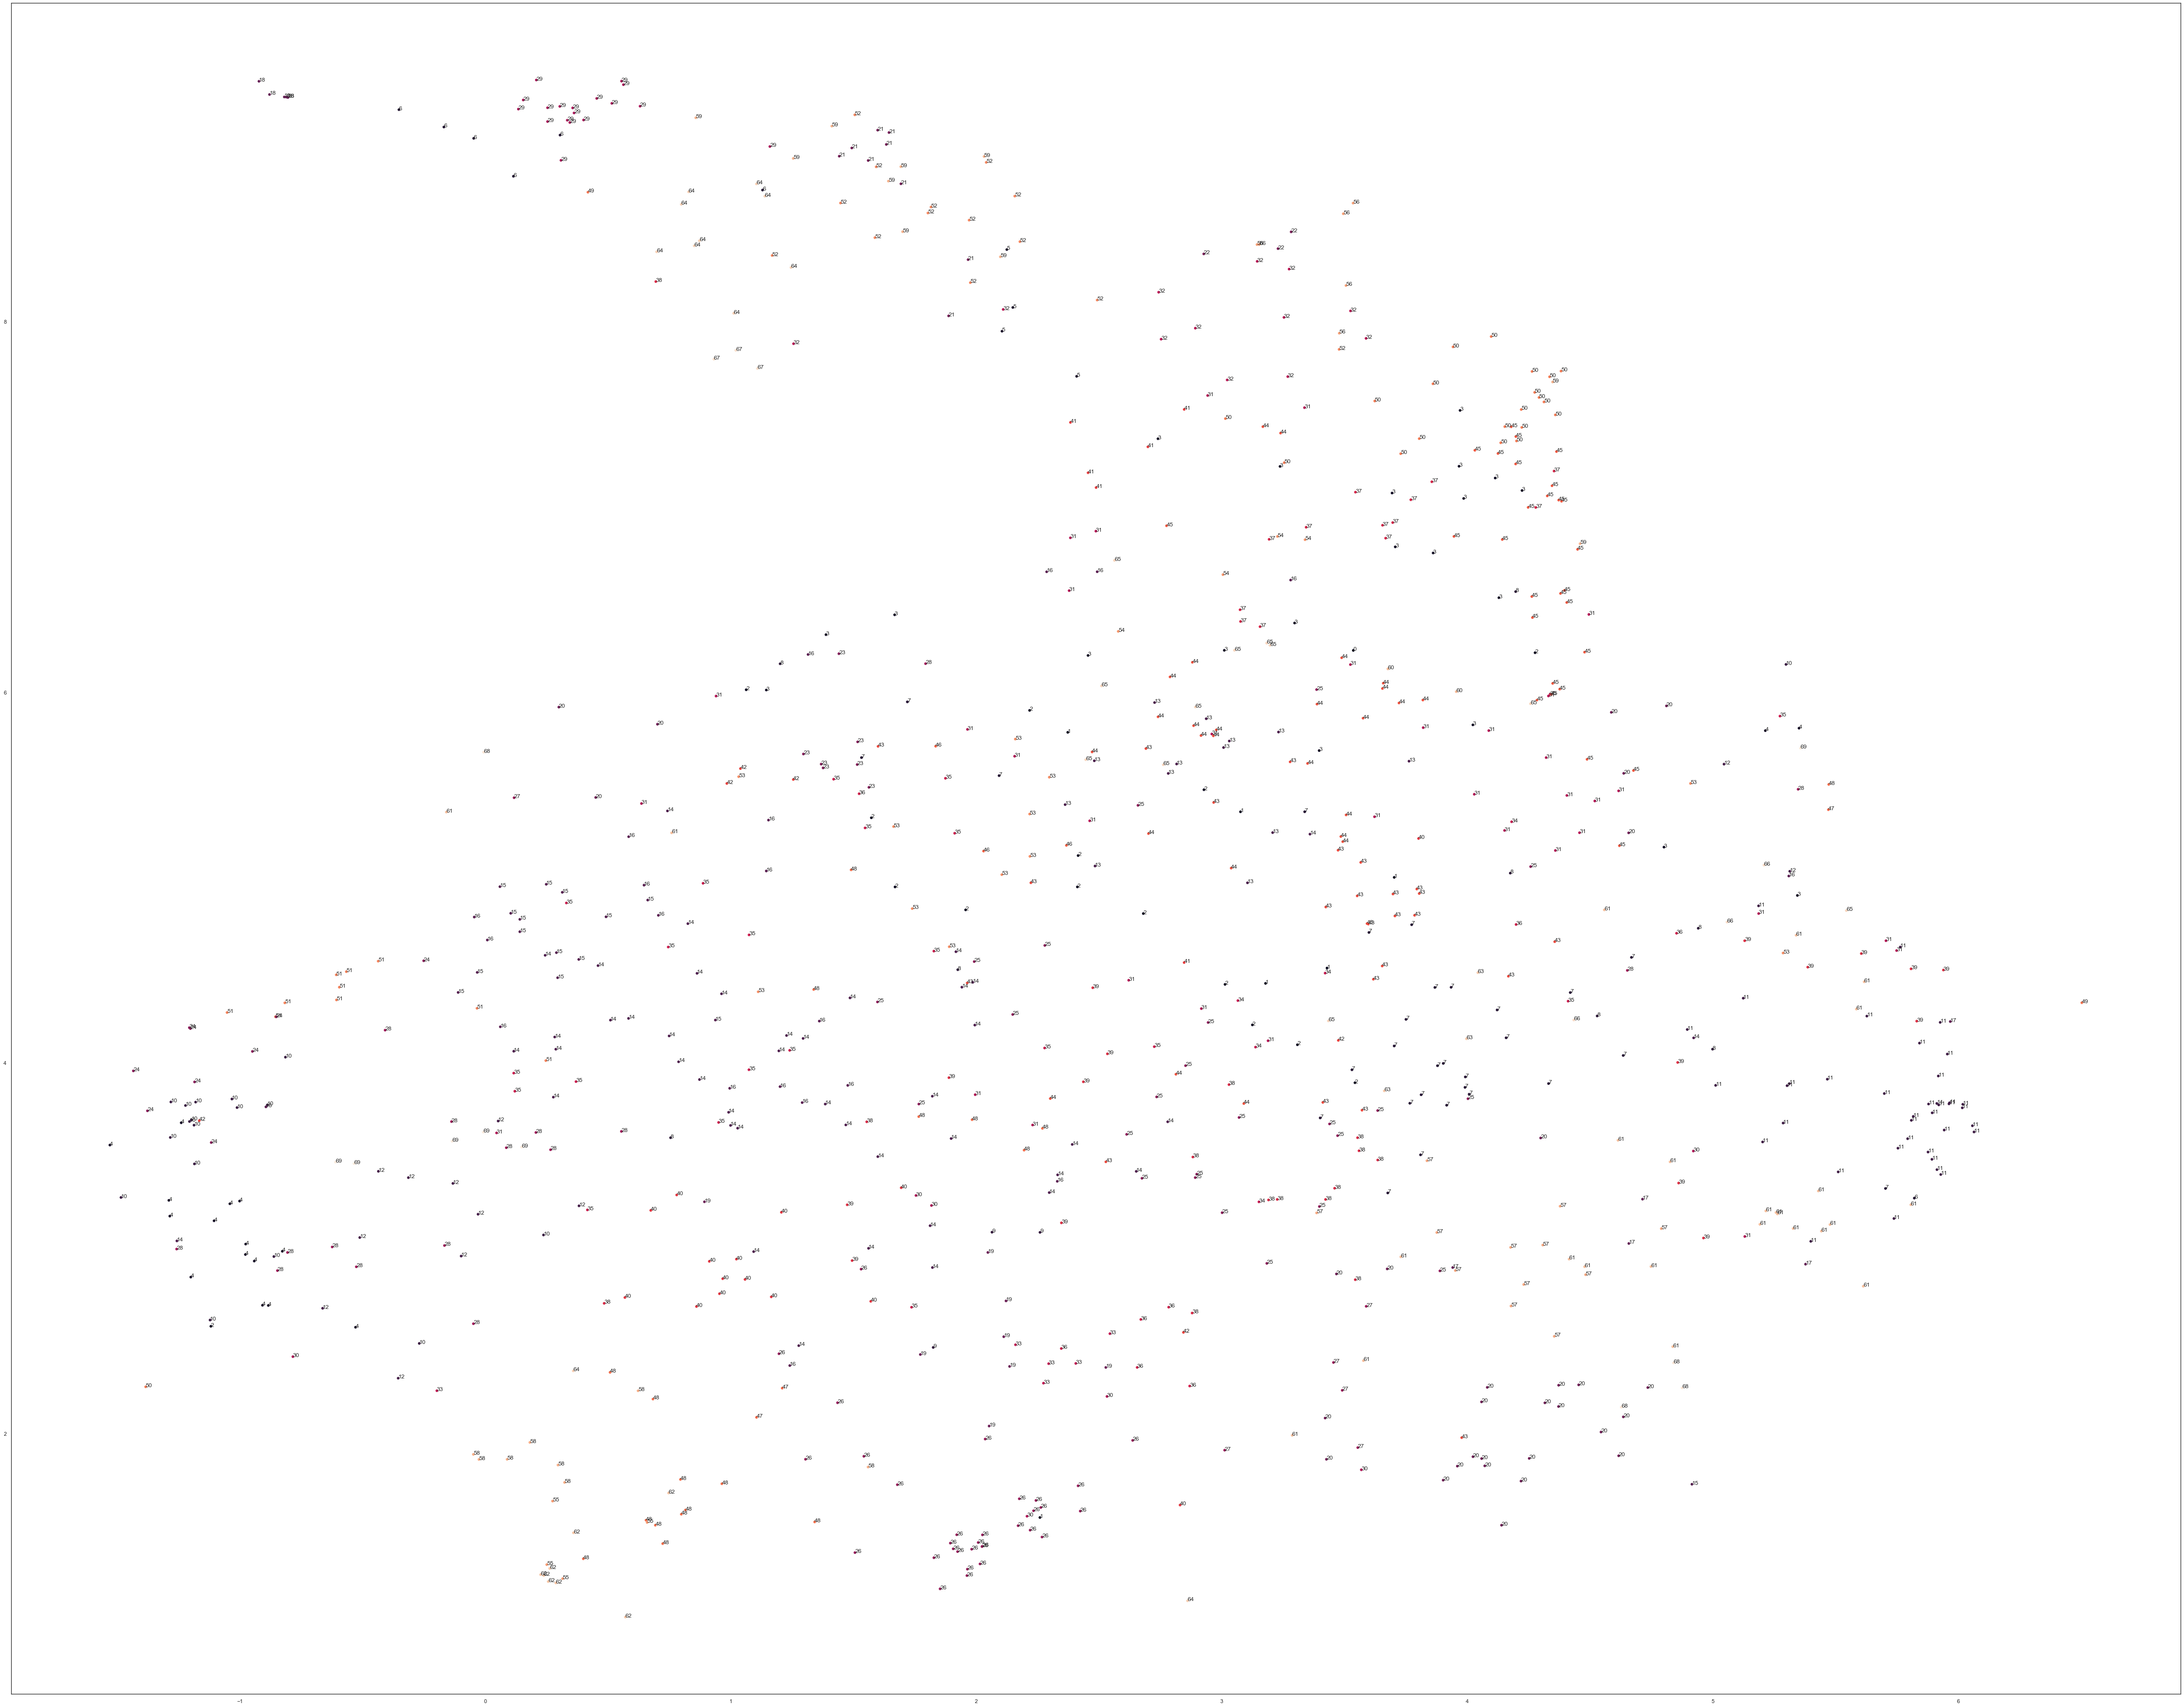

In [79]:
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(80,64)})
 
x=[row[0] for row in clustered_sentence_umap_v1]
y=[row[1] for row in clustered_sentence_umap_v1]
c=clustered_sentence_umap_c1
fig, ax = plt.subplots()
ax.scatter(x,y,c=c,s=20 )
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]))

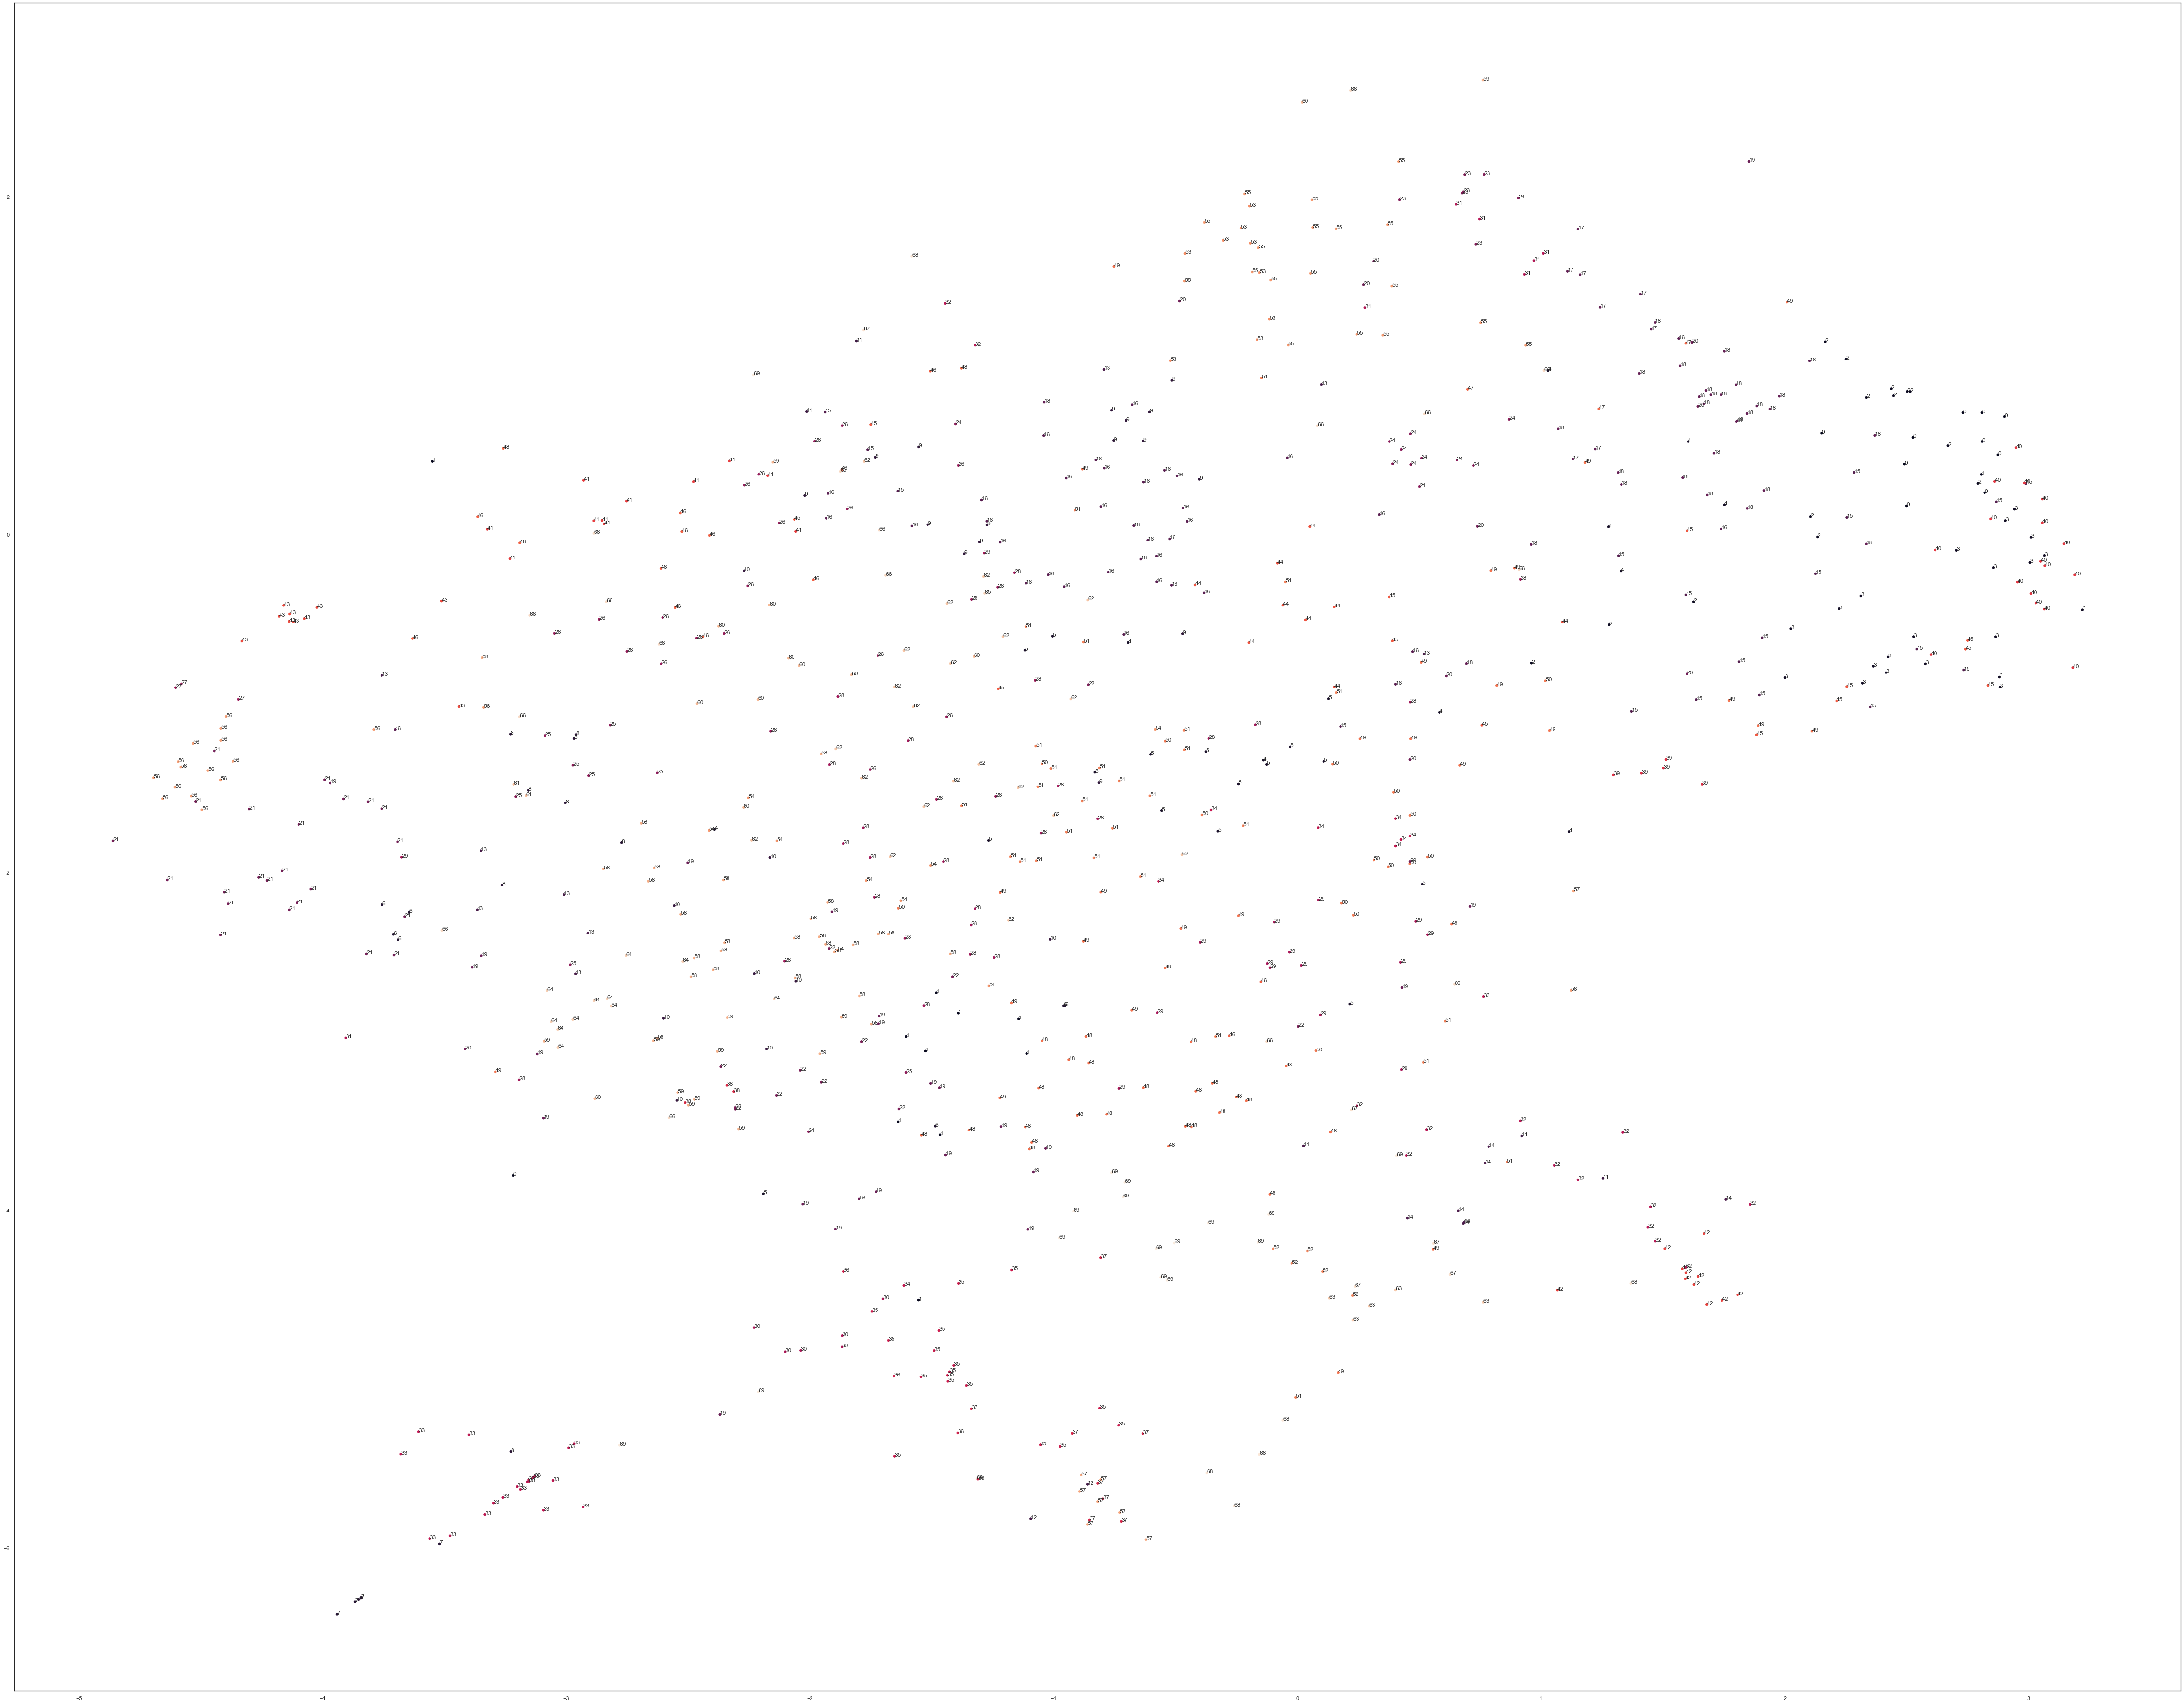

In [80]:
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(80,64)})
 
x=[row[0] for row in clustered_sentence_umap_v2]
y=[row[1] for row in clustered_sentence_umap_v2]
c=clustered_sentence_umap_c2
fig, ax = plt.subplots()
ax.scatter(x,y,c=c,s=20 )
for i, txt in enumerate(c):
    ax.annotate(txt, (x[i], y[i]))

In [81]:
for s in sorted_sentences1:
    if s[0]==26:
        print("==",s[1])

==  Mary Anne MacLeod Relatives Family of Donald Trump Residence .
==  [2] [3] His father was Frederick Christ Trump , a Bronx-born real estate developer whose parents were German immigrants.
==  His mother was Scottish-born housewife Mary Anne MacLeod Trump .
==  [24] [25] Trump's mother Mary Anne MacLeod was born in Scotland.
==  [26] Fred and Mary were married in 1936 and raised their family in Queens.
==  [26] [27] Trump grew up with three elder siblings – Maryanne , Fred Jr.
==  (born 1977), Ivanka (born 1981), and Eric (born 1984), and ten grandchildren.
==  [32] The couple divorced in 1992, following Trump's affair with actress Marla Maples .
==  [33] Maples and Trump married in 1993 [34] [35] and had one daughter, Tiffany (born 1993).
==  [36] They were divorced in 1999, [37] and Tiffany was raised by Marla in California.
==  [38] In 2005, Trump married Slovenian model Melania Knauss .
==  [43] The pastor at Marble, Norman Vincent Peale , [42] ministered to Trump's family and m

In [82]:
subs='Mary Anne MacLeod Trump'
for i in sorted_sentences1:
    if subs in i[1]:
        print(i)

print("======================================")
for i in sorted_sentences2:
    if subs in i[1]:
        print(i)
 

[26, ' His mother was Scottish-born housewife Mary Anne MacLeod Trump .']
[55, ' His mother was Scottish-born housewife Mary Anne MacLeod Trump .']


In [83]:
for s in sorted_sentences1:
    if s[0]==26:
        print("==",s[1])

print("======================================")

print("======================================")
print("======================================")


for s in sorted_sentences2:
    if s[0]==55:
        print("==",s[1])

==  Mary Anne MacLeod Relatives Family of Donald Trump Residence .
==  [2] [3] His father was Frederick Christ Trump , a Bronx-born real estate developer whose parents were German immigrants.
==  His mother was Scottish-born housewife Mary Anne MacLeod Trump .
==  [24] [25] Trump's mother Mary Anne MacLeod was born in Scotland.
==  [26] Fred and Mary were married in 1936 and raised their family in Queens.
==  [26] [27] Trump grew up with three elder siblings – Maryanne , Fred Jr.
==  (born 1977), Ivanka (born 1981), and Eric (born 1984), and ten grandchildren.
==  [32] The couple divorced in 1992, following Trump's affair with actress Marla Maples .
==  [33] Maples and Trump married in 1993 [34] [35] and had one daughter, Tiffany (born 1993).
==  [36] They were divorced in 1999, [37] and Tiffany was raised by Marla in California.
==  [38] In 2005, Trump married Slovenian model Melania Knauss .
==  [43] The pastor at Marble, Norman Vincent Peale , [42] ministered to Trump's family and m

[]


In [232]:
for s in sorted_sentences1:
    if s[0]==3:
        print("==",s[1])

==  The Space Shuttle program finished with its last mission, STS-135 flown by Atlantis , in July 2011, retiring the final Shuttle in the fleet.
==  Challenger (OV-099) was delivered to KSC in July 1982, Discovery (OV-103) in November 1983, Atlantis (OV-104) in April 1985 and Endeavour in May 1991.
==  The final flight of the Space Shuttle program was STS-135 on July 8, 2011.
==  Space Shuttle Atlantis takes flight on the STS-27 mission on December 2, 1988.
==  The Shuttle program continued in September 1988 with the launch of Discovery on STS-26 .
==  The second "Return to Flight" mission, STS-121 launched on July 4, 2006, at 14:37 (EDT).
==  On October 31, 2006, NASA announced approval of the launch of Atlantis for the fifth and final shuttle servicing mission to the Hubble Space Telescope, scheduled for August 28, 2008.
==  Atlantis begins the last mission of the Space Shuttle program .
==  The final Space Shuttle launch was that of Atlantis on July 8, 2011.
==  This is the final fe